# Bin packing algorithm
**Notes:**
- Use greedy bin packer, maximal_rectangle seems cool packing algo, this far i've only tried bottom left heuristic.
- Should be pretty straight forward, enter container sizes that we want to pack and then a new box layout will be presented.
- We want to soleve the problem of filling the box, thus append either small box or enlarge neighbouring boxes.

In [2]:
import greedypacker
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def makeGrid(items, w, h):
    grid = np.zeros((h, w))
    
    for i, item in enumerate(items):
        grid[item.y:item.y+item.height, item.x:item.x+item.width] = i + 1
    print(grid)
    return grid

def plotGrid(grid, num_items):
    fig, ax = plt.subplots()

    min_val, max_val = 0, num_items

    ax.matshow(grid, cmap=plt.cm.Blues)

In [10]:
import greedypacker
w, h = 8, 4

binManager = greedypacker.BinManager(w, h, pack_algo='maximal_rectangle', heuristic='bottom_left', wastemap=True, rotation=True)

items = []
for item in [[2, 2], [1, 2], [2, 3], [2, 1], [2, 1], [2, 1], [1, 1], [2, 2], [1, 2], [2, 3], [2, 1], [2, 1], [2, 1], [1, 1]]:
    items.append(greedypacker.Item(item[0], item[1]))

[binManager.add_items(x) for x in items]
binManager.execute()

for excluded in binManager.bins[1:]:
    print("excluded items", excluded.items)

g = makeGrid(binManager.bins[0].items, w, h)

excluded items [Item(width=2, height=1, x=0, y=0), Item(width=2, height=1, x=2, y=0), Item(width=1, height=1, x=4, y=0), Item(width=1, height=1, x=5, y=0)]
[[ 1.  1.  2.  2.  3.  3.  4.  4.]
 [ 1.  1.  2.  2.  3.  3.  4.  4.]
 [ 1.  1.  2.  2.  5.  6.  6.  7.]
 [ 8.  8.  9.  9.  5. 10. 10.  7.]]


## Beskrivning
Här demonstreras ett ganska enkelt exempel där man automatiskt genererar låduppsättningar. Algoritmet tar in storlekar av lådor och sen placerar ut dem i en matris. Nedan kan man se ett exempel på en sådan matris. Jag använder mig av greedy search och söker efer optimala "maximal_rectangle".

### För generering av låd-layouter
Jag tänker att man ganska enkelt kan uppskatta hur mycket platts de olka komponenterna tar upp areamässigt och lägga in det i databasen. Sen skriver man ett litet verktyg som låter en fylla i hur många av varje komponent man vill ha samt hur många lådor. Algoritmet kommer att försöka packa ihop så mycker som möjligt i dem.

När man gjort det borde det gå ganska lätt att generera bilder för kit osv.

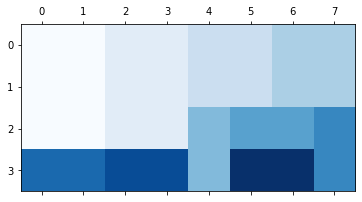

In [11]:
plotGrid(g, len(items))